# Worksheet 08

Name:  Zhengxu Wang  
UID: U81066856

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
|------|--------------|
| A  B |      Dis       |
| A  C |      Agree       |
| A  D |      Agree       |
| A  E |      Agree       |
| B  C |      Dis       |
| B  D |      Agree       |
| B  E |      Agree       |
| C  D |      Agree       |
| C  E |      Agree       |
| D  E |      Dis       |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

nC2 = n! / (2! * (n-2)!)

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

nC2 = (n * (n-1)) / 2 = (9 * 8) / 2 = 36

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

In cluster 0, there are (3 x 2) / 2 = 3 pairs that agree with C.  
In cluster 1, there are (2 x 1) / 2 = 1 pairs that agree with C.  
In cluster 2, there are (4 x 3) / 2 = 6 pairs that agree with C.  
36 - 10 = 26

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

cluster it using a clustering algorithm (e.g., k-means) and return the cluster labels.

Once the clustering of each subset is complete, merge the resulting clusters together to form larger clusters.

For each pair of clusters, compute the number of disagreements between them using the formula from part (b).

Continue merging clusters until there are no more clusters left.

The total number of disagreements between the original clusters is the sum of the disagreements between all pairs of clusters.

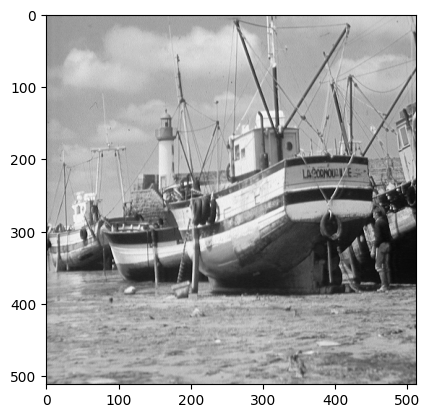

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

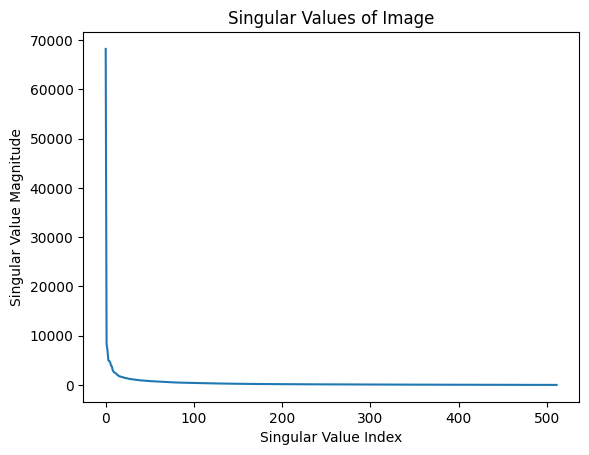

In [2]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(s)
plt.title("Singular Values of Image")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value Magnitude")
plt.show()

Notice you can get the image back by multiplying the matrices back together:

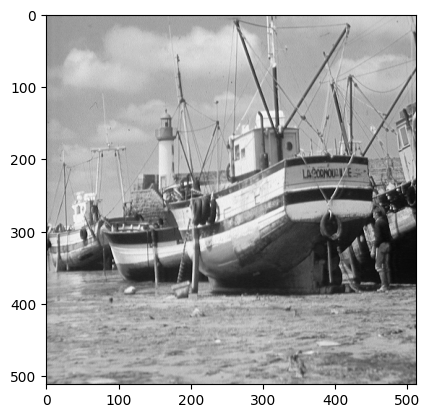

In [3]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [4]:
scopy = s.copy()
scopy[1:] = 0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

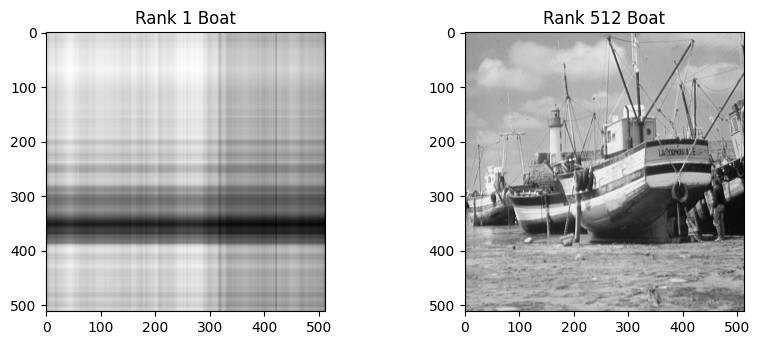

In [5]:
r = 1
u_r = u[:, :r]
s_r = np.diag(s[:r])
vt_r = vt[:r, :]
boat_app = u_r @ s_r @ vt_r

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

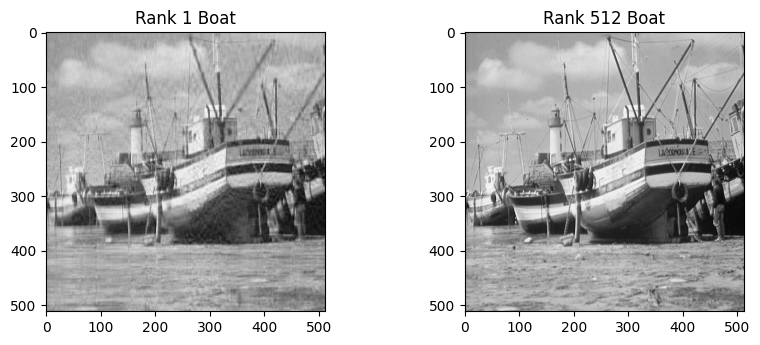

In [6]:
r = 40
u_r = u[:, :r]
s_r = np.diag(s[:r])
vt_r = vt[:r, :]
boat_app = u_r @ s_r @ vt_r

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

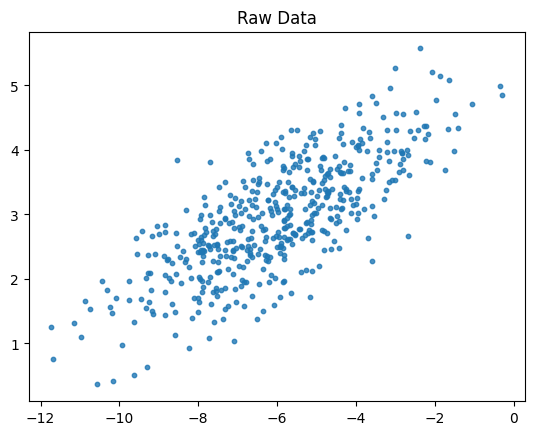

In [7]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

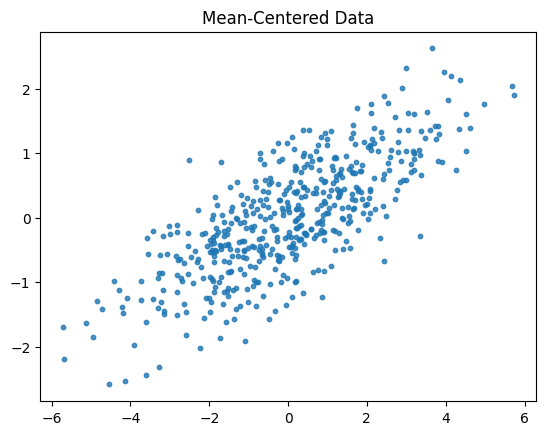

In [8]:
X_centered = X - np.mean(X, axis=0)

plt.scatter(X_centered[:, 0], X_centered[:, 1], s=10, alpha=0.8)
plt.title("Mean-Centered Data")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [9]:
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

print("Number of singular values:", len(S))

Number of singular values: 2


We expect there to be two singular values. This is because each singular value represents the amount of variance captured by each principal component of the data. Since there are two principal components (i.e., the two features), there should be two singular values.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

The line would lie along the direction of the principal component with the largest variance. This is because the first singular value represents the amount of variance captured by the first principal component, and the second singular value represents the amount of variance captured by the second principal component.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

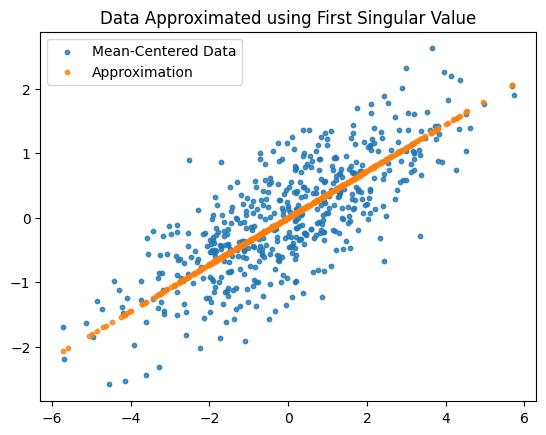

In [11]:
X_approx = U[:, :1] @ np.diag(S[:1]) @ Vt[:1, :]

plt.scatter(X_centered[:, 0], X_centered[:, 1], s=10, alpha=0.8, label="Mean-Centered Data")
plt.scatter(X_approx[:, 0], X_approx[:, 1], s=10, alpha=0.8, label="Approximation")
plt.legend()
plt.title("Data Approximated using First Singular Value")
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

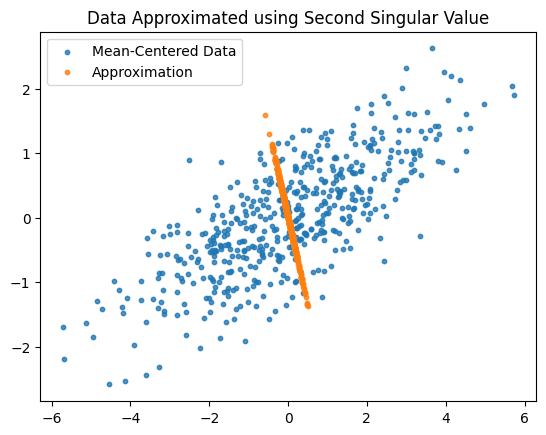

In [15]:
X_approx = U[:, 1:] @ np.diag(S[1:]) @ Vt[1:, :]

plt.scatter(X_centered[:, 0], X_centered[:, 1], s=10, alpha=0.8, label="Mean-Centered Data")
plt.scatter(X_approx[:, 0], X_approx[:, 1], s=10, alpha=0.8, label="Approximation")
plt.legend()
plt.title("Data Approximated using Second Singular Value")
plt.show()

As we can see, the approximation (orange points) lies along a line passing through the mean of the data (blue point), but this line is oriented along a different direction than the line obtained using the first singular value.